In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
plt.rcParams['font.family'] = 'AppleGothic'

In [18]:
data = pd.read_csv('~/ML_data/Apart Deal.csv')

/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [19]:
data.head()

,지역코드,법정동,거래일,아파트,지번,전용면적,층,건축년도,거래금액
0,31110,학성동,5/30/2020 0:00,남운학성타운,379,135.5800,8,1991,26700
1,31110,남외동,1/3/2020 0:00,남외푸르지오1차,506-1,101.6000,2,2006,35500
2,31110,남외동,1/3/2020 0:00,에일린의뜰,500,84.9920,11,2007,36500
3,31110,남외동,1/3/2020 0:00,남외푸르지오1차,506-1,118.7060,8,2006,43000
4,31110,남외동,1/4/2020 0:00,남외푸르지오2차,501-1,84.9636,7,2007,38700


In [20]:
data.size

38841327

In [21]:
data['지역코드'].unique()

array([31110, 31140, 31170, 31200, 31710, 36110, 41111, 41113, 41115,
       41117, 41131, 41133, 41135, 41150, 41171, 41173, 41190, 41210,
       41220, 41250, 41271, 41273, 41281, 41285, 41287, 41290, 41310,
       41360, 41370, 41390, 41410, 41430, 41450, 41461, 41463, 41465,
       41480, 41500, 41550, 41570, 41590, 41610, 41630, 41650, 41670,
       41800, 41820, 41830, 42110, 42130, 42150, 42170, 42190, 42210,
       42230, 42720, 42730, 42750, 42760, 42770, 42780, 42790, 42800,
       42810, 42820, 42830, 43111, 43112, 43113, 43114, 43130, 43150,
       43720, 43730, 43740, 43745, 43750, 43760, 43770, 43800, 44131,
       44133, 44150, 44180, 44200, 44210, 44230, 44250, 44270, 44710,
       44760, 44770, 44790, 44800, 44810, 44825, 45111, 45113, 45130,
       45140, 45180, 45190, 45210, 45710, 45720, 45730, 45740, 45750,
       45770, 45790, 45800, 46110, 46130, 46150, 46170, 46230, 46710,
       46720, 46730, 46770, 46780, 46790, 46800, 46810, 46820, 46830,
       46840, 46860,

데이터가 너무 많다. 사람들이 가장 관심 있어하는 서울(지역코드:11---)만 보도록하겠다.

In [22]:
Seoul = data[12000 > data['지역코드']]
Seoul = Seoul[Seoul['지역코드'] > 11000]
Seoul.info()
Seoul.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 557061 entries, 655312 to 4288652
Data columns (total 9 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   지역코드    557061 non-null  int64  
 1   법정동     557061 non-null  object 
 2   거래일     557061 non-null  object 
 3   아파트     557061 non-null  object 
 4   지번      556845 non-null  object 
 5   전용면적    557061 non-null  float64
 6   층       557061 non-null  object 
 7   건축년도    557061 non-null  int64  
 8   거래금액    557061 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 42.5+ MB


,지역코드,법정동,거래일,아파트,지번,전용면적,층,건축년도,거래금액
655312,11110,내수동,1/13/2018,경희궁의아침2단지,71,140.78,15,2004,130000
655313,11110,내수동,1/19/2018,경희궁 파크팰리스,95,103.77,5,2003,96000
655314,11110,내수동,1/23/2018,경희궁의아침3단지,72,123.13,10,2004,118000
655315,11110,내수동,1/30/2018,세종로대우,167,66.96,13,1994,54500
655316,11110,내수동,1/31/2018,세종로대우,167,76.66,11,1994,64000


1. 다행히도 Null값은 없다.
2. '층'의 Dtype이 Int가 아니다. 모두 int형으로 바꿔주자
3. '거래일'의 Dtype을 다른 숫자, 연산들과 호환하기 쉽도록 datatime으로 바꿔보자

In [23]:
Seoul['거래일'] = pd.to_datetime(Seoul['거래일'])

In [24]:
Seoul['층'] = np.int64(Seoul['층'])
Seoul.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 557061 entries, 655312 to 4288652
Data columns (total 9 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   지역코드    557061 non-null  int64         
 1   법정동     557061 non-null  object        
 2   거래일     557061 non-null  datetime64[ns]
 3   아파트     557061 non-null  object        
 4   지번      556845 non-null  object        
 5   전용면적    557061 non-null  float64       
 6   층       557061 non-null  int64         
 7   건축년도    557061 non-null  int64         
 8   거래금액    557061 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(3)
memory usage: 42.5+ MB


In [25]:
Seoul['층'].value_counts().sort_values()[:20]

-4      1
 69     2
 61     3
 68     3
 59     4
 67     4
 65     4
 64     4
 60     4
 66     5
 62     5
 56     6
-3      6
 57     7
 63     7
 55    12
 58    13
 50    14
 52    15
 53    15
Name: 층, dtype: int64

마이너스 값을 가진 층과 초고층은 데이터가 적어 평균 수요에 노이즈로 작용할 수 있으므로 제외하도록 하자.

In [31]:
Seoul = Seoul[Seoul['층'] >= 0]
Seoul = Seoul[Seoul['층'] < 59]

In [38]:
Seoul['전용면적'].value_counts()

84.96     10747
84.99     10531
84.97     10432
84.98     10248
59.99      6506
          ...  
25.39         1
64.16         1
156.25        1
100.37        1
80.22         1
Name: 전용면적, Length: 12499, dtype: int64

전용면적의 영향은 미미할 것이라 생각한다. 84와 84.3의 가격차이가 없을 것이라 본다.(증명은 생략)

In [39]:
Seoul['전용면적'] = np.int64(Seoul['전용면적'])

In [40]:
Seoul.corr()

,지역코드,전용면적,층,건축년도,거래금액
지역코드,1.000000,0.072400,-0.010648,-0.085248,0.261758
전용면적,0.072400,1.000000,0.112377,0.076071,0.591015
층,-0.010648,0.112377,1.000000,0.194802,0.152213
건축년도,-0.085248,0.076071,0.194802,1.000000,0.053414
거래금액,0.261758,0.591015,0.152213,0.053414,1.000000


In [41]:
Seoul.describe()

,지역코드,전용면적,층,건축년도,거래금액
count,556902.000000,556902.000000,556902.000000,556902.000000,556902.000000
mean,11458.542428,78.000156,9.010172,1999.339744,62832.121962
std,174.295876,29.637330,6.066642,9.418959,45435.861955
min,11110.000000,10.000000,1.000000,1961.000000,700.000000
25%,11320.000000,59.000000,4.000000,1993.000000,35500.000000
50%,11470.000000,84.000000,8.000000,2000.000000,50000.000000
75%,11620.000000,84.000000,13.000000,2006.000000,75000.000000
max,11740.000000,424.000000,58.000000,2021.000000,840000.000000


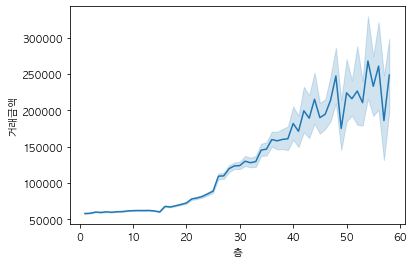

In [33]:
sns.lineplot(x=Seoul['층'],y=Seoul['거래금액'])
plt.show()

아주 직설적으로 해석할 수 있는 그래프다. 고층일수록 거래금액도 오른다.
대체적으로 20층 밑으로는 상승률이 크지 않다. 적정 높이 이상층부터는 건축법에 의해 뭔가 까다롭다고 들은 적이 있다.
아무튼 합리적으로 고층을 사고 싶을 때는 20층 즈음이 좋지 않을까? 고층을 추구한다면 애매하게 8층 살 바에는 14층 사는 것이 좋아보이는 듯!

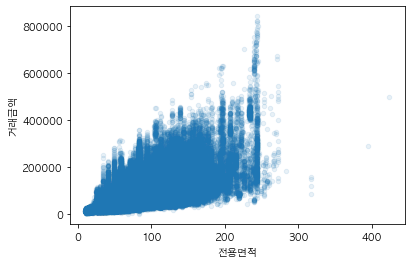

In [42]:
Seoul.plot(kind='scatter', x='전용면적', y='거래금액', alpha=0.1)
plt.show()

전용면적에 따라 거래금액도 대체적으로 상승한다.

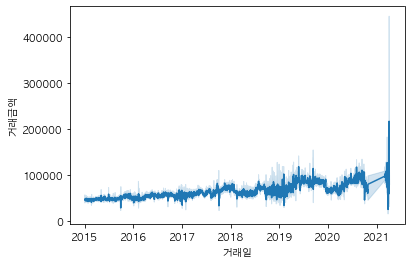

In [34]:
sns.lineplot(x=Seoul['거래일'],y=Seoul['거래금액'])
plt.show()

노이즈가 많긴하지만, 시간이 지날수록 거래금액이 조금씩 올라가는 것을 볼 수 있다. 